In [8]:
#Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Others
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.display.float_format = '{:.2f}'.format

In [26]:
import data_describe as dd

In [2]:
# incase google-cloud-bigquery-storage is not installed
#!pip install google-cloud-bigquery-storage

In [3]:
# Data Access Libraries
from google.cloud import bigquery
client = bigquery.Client()
job_config = bigquery.QueryJobConfig()

In [6]:
client = bigquery.Client()

QUERY = """
    SELECT
    pickup_location AS pickup_location,
    SUM(trip_miles) AS trip_miles_sum
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY pickup_location
ORDER BY trip_miles_sum DESC
LIMIT 10
        """

df = client.query(QUERY).to_dataframe()


In [9]:
# top 10 pick up locations based on the trip distance
df

,pickup_location,trip_miles_sum
0,POINT (-87.9030396611 41.9790708201),110112864.51
1,None,62844449.31
2,POINT (-87.913624596 41.9802643146),41734066.04
3,POINT (-87.6327464887 41.8809944707),36111376.59
4,POINT (-87.6333080367 41.899602111),29829663.71
5,POINT (-87.6209929134 41.8849871918),24676560.07
6,POINT (-87.7509342894 41.785998518),23067794.66
7,POINT (-87.6251921424 41.8788655841),20902283.53
8,POINT (-87.6262149064 41.8925077809),18252480.00
9,POINT (-87.6559981815 41.9442266014),15633113.92


<AxesSubplot:xlabel='pickup_location'>

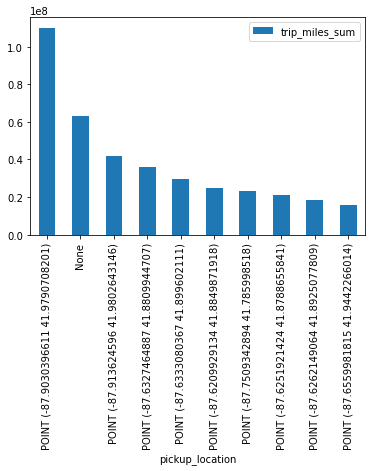

In [12]:
df.plot(kind='bar', x = 'pickup_location', y = 'trip_miles_sum' )

In [14]:
Q2 = """
SELECT
    pickup_location,
    SUM(trip_seconds) AS trip_seconds_sum,
    SUM(fare) AS fare_sum
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY pickup_location
ORDER BY fare_sum DESC
LIMIT 10
"""
df2 = client.query(Q2).to_dataframe()

In [16]:
#Top 10 Pickup Locations based on the total fare and drip duration (in seconds)

df2

,pickup_location,trip_seconds_sum,fare_sum
0,None,13710318154,338275716.80
1,POINT (-87.9030396611 41.9790708201),16937538125,300484301.82
2,POINT (-87.6327464887 41.8809944707),11752590229,180180078.64
3,POINT (-87.913624596 41.9802643146),6319352799,114155454.28
4,POINT (-87.6209929134 41.8849871918),7139505853,113301429.68
5,POINT (-87.6333080367 41.899602111),6713518678,111306728.71
6,POINT (-87.6262149064 41.8925077809),5244359525,81970984.49
7,POINT (-87.6251921424 41.8788655841),4538111239,74546274.27
8,POINT (-87.7509342894 41.785998518),3822611563,69418752.12
9,POINT (-87.6559981815 41.9442266014),4146956248,65047981.32


In [22]:
Q3 = """
    SELECT
    pickup_location,
    SUM(fare) AS fare_sum,
    SUM(trip_miles) AS trip_miles_sum
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY pickup_location
ORDER BY fare_sum DESC
LIMIT 10
        """

df3 = client.query(Q3).to_dataframe()

In [23]:
# Top 10 Pickup Locations based on the total fare and distance (miles)

df3

,pickup_location,fare_sum,trip_miles_sum
0,None,338275716.80,62844449.31
1,POINT (-87.9030396611 41.9790708201),300484301.82,110112864.51
2,POINT (-87.6327464887 41.8809944707),180180078.64,36111376.59
3,POINT (-87.913624596 41.9802643146),114155454.28,41734066.04
4,POINT (-87.6209929134 41.8849871918),113301429.68,24676560.07
5,POINT (-87.6333080367 41.899602111),111306728.71,29829663.71
6,POINT (-87.6262149064 41.8925077809),81970984.49,18252480.00
7,POINT (-87.6251921424 41.8788655841),74546274.27,20902283.53
8,POINT (-87.7509342894 41.785998518),69418752.12,23067794.66
9,POINT (-87.6559981815 41.9442266014),65047981.32,15633113.92


In [24]:
Q4 = """
SELECT
    avg(fare) AS fare_avg,
    avg(trip_seconds) AS trip_seconds_avg,
    avg(trip_miles) AS trip_miles_avg,
    EXTRACT(DAYOFWEEK FROM trip_end_timestamp) AS trip_end_day_of_week
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY trip_end_day_of_week
order by fare_avg desc
"""
df4 = client.query(Q4).to_dataframe()

In [32]:
# We can see avg fare,avg distance travelled is more on Tuesdays

df4 = df4[~df4.trip_end_day_of_week.isnull()]

df4

#another inference is the trips are really less during the weekends

,fare_avg,trip_seconds_avg,trip_miles_avg,trip_end_day_of_week
0,13.98,801.13,3.61,2.00
1,13.60,747.51,3.50,1.00
2,13.32,828.89,3.29,5.00
3,13.29,806.26,3.30,4.00
4,13.17,784.46,3.27,3.00
5,12.79,802.97,3.09,6.00
6,11.80,711.61,2.76,7.00


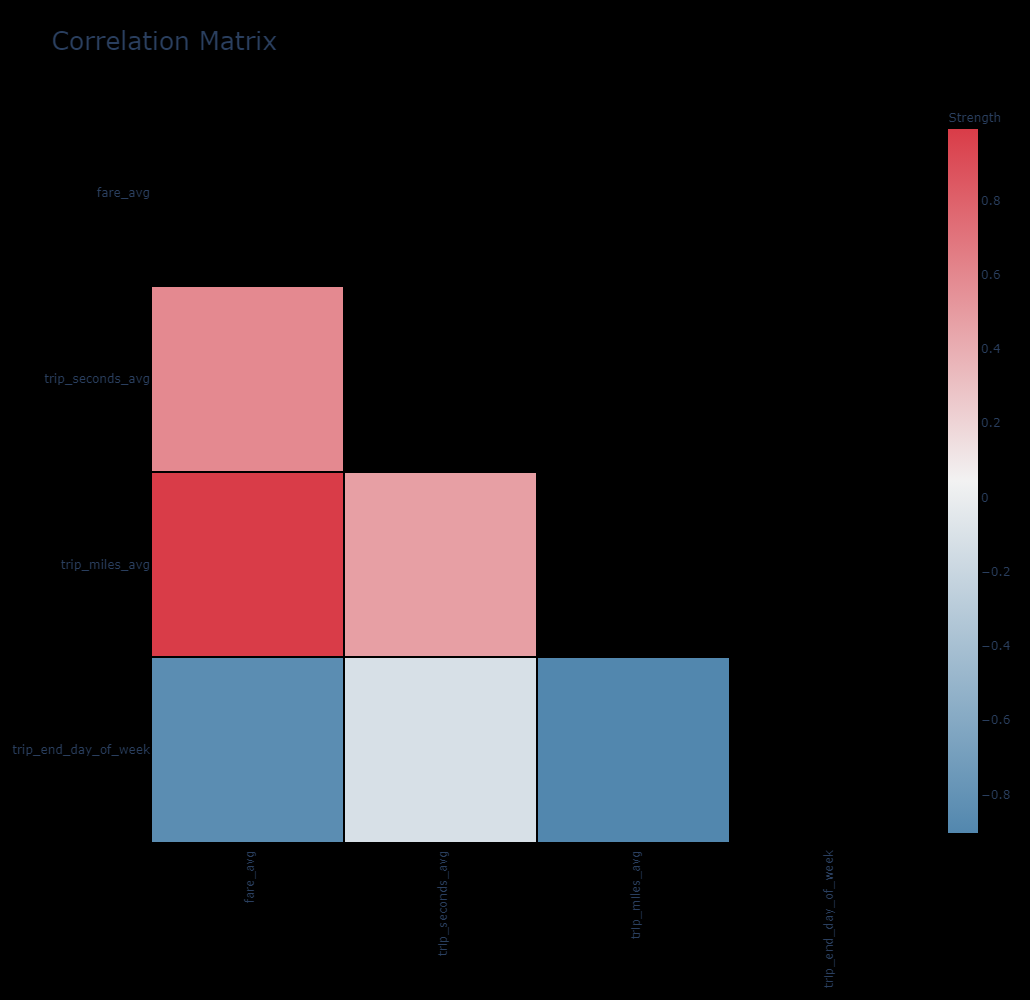

In [29]:
dd.correlation_matrix(df4, cluster=False)

In [33]:
Q5 =  """
SELECT
    avg(fare) AS fare_avg,
    avg(trip_seconds) AS trip_seconds_avg,
    avg(trip_miles) AS trip_miles_avg,
    EXTRACT(DAYOFWEEK FROM trip_end_timestamp) AS trip_end_day_of_week,
    EXTRACT(YEAR FROM trip_end_timestamp) AS trip_end_year
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY trip_end_year, trip_end_day_of_week
order by fare_avg desc
"""

df5 = client.query(Q5).to_dataframe()

In [36]:
df5.isnull().sum()

fare_avg                0
trip_seconds_avg        6
trip_miles_avg          0
trip_end_day_of_week    1
trip_end_year           1
dtype: int64

In [39]:
df5 = df5[~df5.trip_end_year.isnull()]

In [42]:
df5[df5.trip_seconds_avg.isnull()]

,fare_avg,trip_seconds_avg,trip_miles_avg,trip_end_day_of_week,trip_end_year
0,38.05,nan,18.10,3.00,2010.00
25,13.65,nan,5.60,4.00,2012.00
58,10.15,nan,0.00,2.00,2012.00
59,6.25,nan,1.20,2.00,1987.00
60,0.00,nan,0.00,2.00,1900.00


In [51]:
df5 = df5[~df5.trip_seconds_avg.isnull()]

<AxesSubplot:xlabel='trip_end_day_of_week', ylabel='trip_miles_avg'>

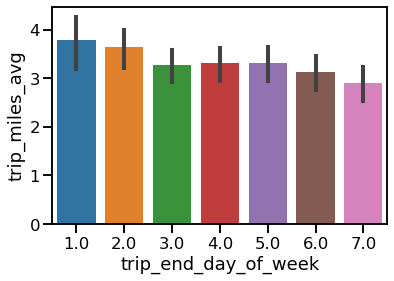

In [63]:
sns.barplot(x = df5['trip_end_day_of_week'], y = df5['trip_miles_avg'])

<AxesSubplot:xlabel='trip_end_day_of_week', ylabel='fare_avg'>

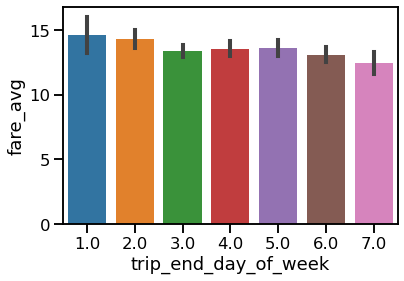

In [60]:
sns.barplot(x = df5['trip_end_day_of_week'], y = df5['fare_avg'])

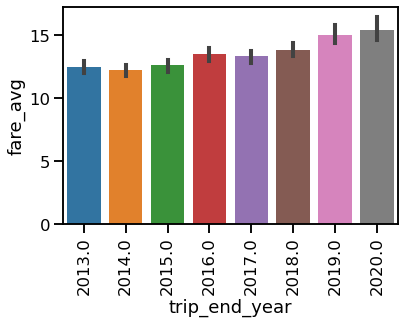

In [62]:
ax= sns.barplot(x = df5['trip_end_year'], y = df5['fare_avg'])
plt.xticks(rotation = 90)
plt.show()

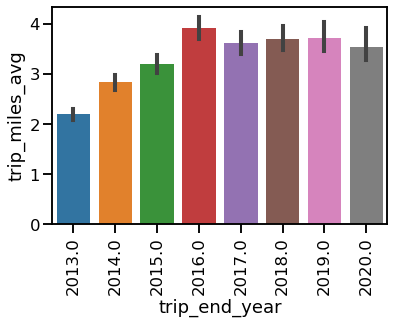

In [65]:
sns.barplot(x = df5['trip_end_year'], y = df5['trip_miles_avg'])
plt.xticks(rotation = 90)
plt.show()

In [53]:
clusters = dd.cluster(df5)

<AxesSubplot:title={'center':'kmeans Cluster'}, xlabel='Reduced Dimension 1', ylabel='Reduced Dimension 2'>

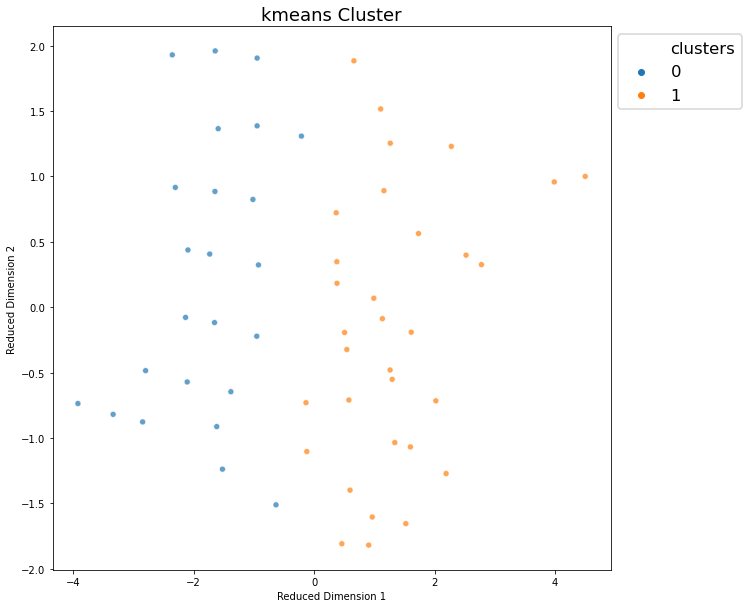

In [54]:
clusters

In [55]:
clusters_df = df5
clusters_df['cluster'] = clusters.clusters

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
dd.data_summary(clusters_df.loc[clusters_df.cluster == 0])

,fare_avg,trip_seconds_avg,trip_miles_avg,trip_end_day_of_week,trip_end_year,cluster
Data Type,float64,float64,float64,float64,float64,int32
Mean,12.44,740.67,2.81,4.38,2014.38,0.00
Standard Deviation,0.61,32.30,0.47,2.16,1.31,0.00
Median,12.46,751.27,2.86,4.50,2014.00,0.00
Min,11.01,681.48,1.89,1.00,2013.00,0
Max,13.51,785.21,3.55,7.00,2018.00,0
# Zeros,0,0,0,0,0,24
# Nulls,0,0,0,0,0,0
% Most Frequent Value,4.17,4.17,4.17,25.00,29.17,100.00


In [57]:
dd.data_summary(clusters_df.loc[clusters_df.cluster == 1])

,fare_avg,trip_seconds_avg,trip_miles_avg,trip_end_day_of_week,trip_end_year,cluster
Data Type,float64,float64,float64,float64,float64,int32
Mean,14.41,844.30,3.75,3.72,2018.09,1.00
Standard Deviation,1.13,45.93,0.37,1.89,1.44,0.00
Median,14.25,840.95,3.66,4.00,2018.00,1.00
Min,12.89,739.82,3.18,1.00,2016.00,1
Max,18.31,941.04,4.58,7.00,2020.00,1
# Zeros,0,0,0,0,0,0
# Nulls,0,0,0,0,0,0
% Most Frequent Value,3.12,3.12,3.12,15.62,21.88,100.00
